<a href="https://colab.research.google.com/github/chakravarthipothureddy/medical_insurance-premiun/blob/main/medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the Data

In [2]:
df = pd.read_csv('/content/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Exploration

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

Check the null values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
len(df.select_dtypes(include = 'object').columns)

3

In [11]:
df.select_dtypes(include = ['int','float']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [12]:
len(df.select_dtypes(include = ['int','float']).columns)

4

In [13]:
#group the dataset by 'sex','smoker','region'
df.groupby('sex').mean()

<ipython-input-13-08cb0e765ccd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [14]:
df.groupby('smoker').mean()

<ipython-input-14-cd9be18b1d80>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [15]:
df.groupby('region').mean()

<ipython-input-15-560d20b76c1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Dealing with null values

In [16]:
df.isnull().values.any()

False

In [17]:
df.isnull().values.sum()

0

In [18]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [19]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
#dummification

df = pd.get_dummies(data=df, drop_first=True)

In [21]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [22]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


correlation matrix

In [23]:
DF = df.drop(columns='charges')

In [24]:
DF

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


<Axes: title={'center': 'Correlation with Charges'}>

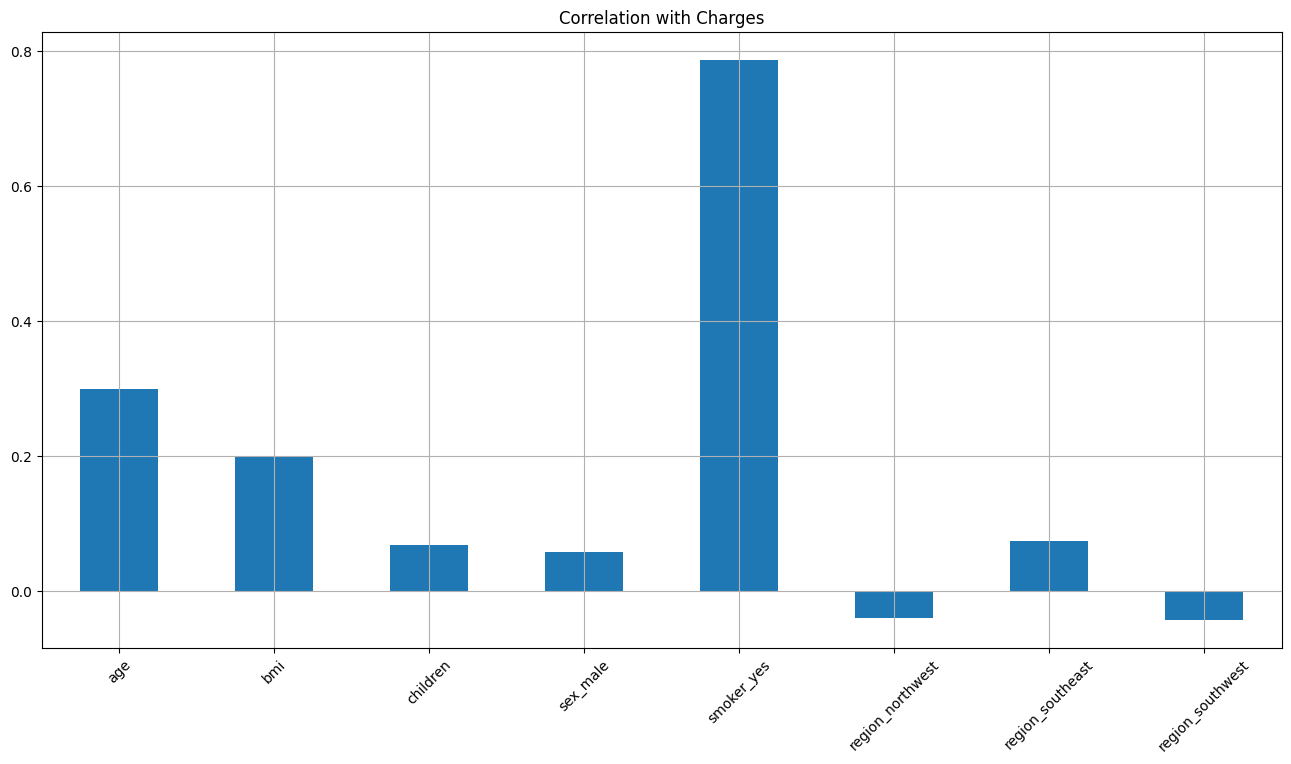

In [25]:
DF.corrwith(df['charges']).plot.bar(
    figsize=(16,8), title='Correlation with Charges', rot=45, grid=True
)


In [26]:
corr = df.corr()

<Axes: >

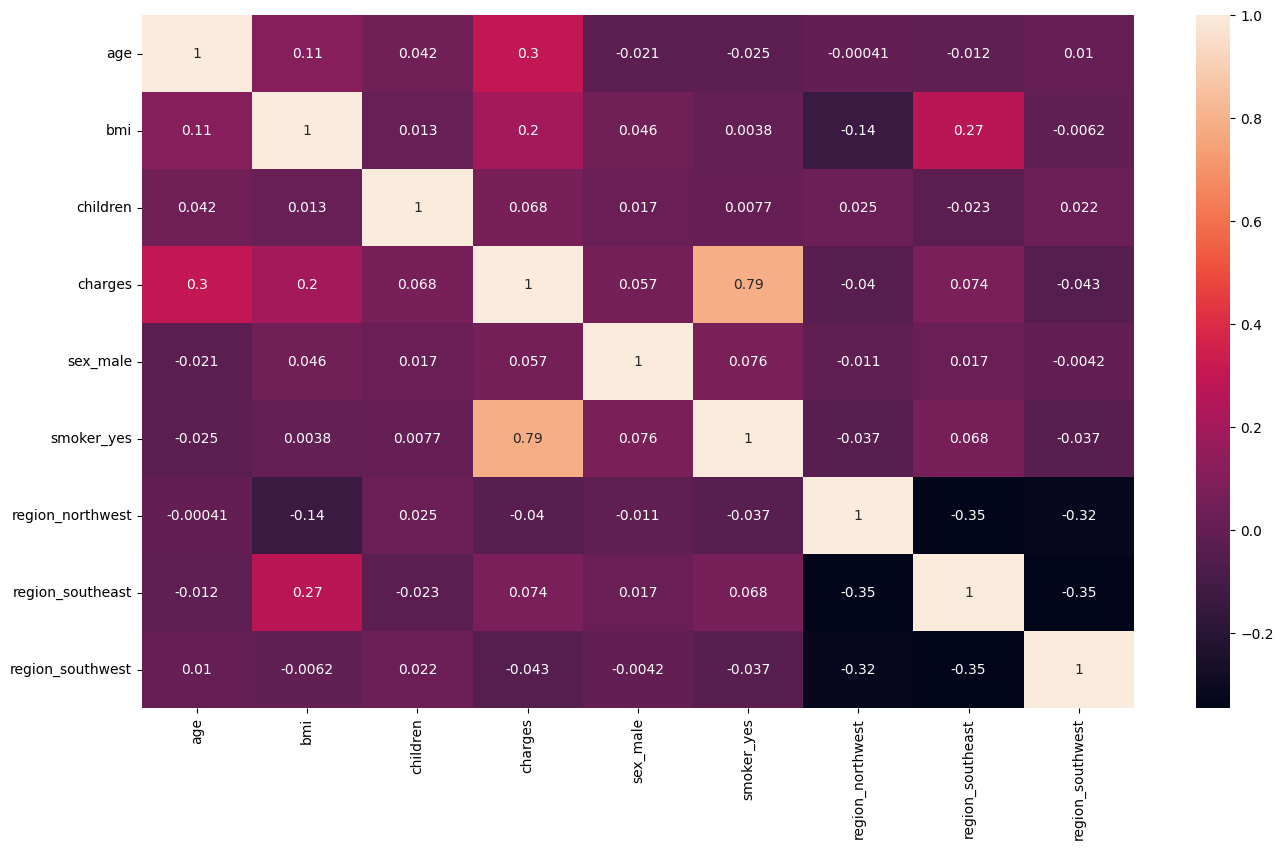

In [27]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

# > Split the dataset

In [28]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [29]:
x = df.drop(columns='charges')
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [30]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0) 

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [36]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

Model building


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.7999876970680433

# Randomforest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([10245.9858357 ,  9787.1860621 , 44901.3358461 , 13382.207227  ,
        9946.3969433 , 11331.4698575 ,  2105.618029  , 12694.7062828 ,
        7235.5788305 ,  5965.702267  ,  7243.6866075 , 16936.7067909 ,
        9281.1630367 ,  6270.9582906 , 24019.6745421 , 13079.5742763 ,
       13375.1452844 ,  7775.7683371 ,  6451.9644453 , 34121.141383  ,
       23980.8785445 , 13114.5869833 , 10314.5809243 , 27191.1254435 ,
        3348.6979027 ,  4923.4069302 ,  5986.0623057 ,  8604.646017  ,
        4009.6101344 , 12266.9791695 ,  7794.0920158 , 48467.707292  ,
       14484.7575341 , 10879.5152489 , 15447.4926881 ,  4149.131858  ,
        9024.8882495 , 38138.9034713 , 39749.4701715 ,  6664.6004073 ,
       10024.997775  ,  3992.1210463 , 20591.2183343 , 47701.5510024 ,
       36937.8520142 ,  4758.1286256 , 13077.7517568 ,  6782.707846  ,
        5048.171378  , 14564.099076  ,  3139.189885  , 12996.8386885 ,
       27319.9308849 , 49027.0452079 , 11711.5306475 ,  6148.9465723 ,
      

In [43]:
r2_score(y_test, y_pred_rf)

0.877583192902744

# XG boost

In [44]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [45]:
y_pred_xgb = regressor_xgb.predict(x_test)
y_pred_xgb

array([12058.127 , 10265.056 , 44051.996 , 14142.8545, 10561.935 ,
        7561.4834,  2432.5679, 13287.392 ,  7346.294 ,  6773.392 ,
        6606.1675, 14016.326 ,  9238.723 ,  5367.3936, 22862.375 ,
       12252.858 , 14449.633 ,  5611.447 ,  6968.605 , 34510.062 ,
       24281.33  , 15688.968 , 12024.785 , 27575.611 ,  3177.4856,
        6564.208 ,  5962.0874,  7536.3223,  4315.0635, 10422.395 ,
        7384.263 , 46732.812 , 13917.667 , 11552.406 , 16478.514 ,
        4471.5566,  9460.232 , 39083.934 , 40876.8   ,  3162.1106,
        7463.2036,  4382.231 , 19852.611 , 47552.906 , 37237.125 ,
        6368.203 , 12252.858 ,  7123.0747,  6135.661 , 12468.037 ,
        3919.5708,  7918.551 , 27291.822 , 47186.945 , 11598.098 ,
        5152.155 ,  3822.7317, 11434.305 , 10372.342 , 16538.904 ,
        2607.4695, 46609.234 , 16137.705 , 12243.9375, 11204.922 ,
       10535.699 , 33848.203 , 41660.848 ,  5435.288 ,  9370.524 ,
       14317.965 , 12329.206 , 18068.488 , 14082.773 , 14008.1

In [46]:
r2_score(y_test, y_pred_xgb)

0.8953971644895995